# Ex 1

In [1]:
import numpy as np
a = np.random.random((10, 3))
print(a)
print([b[np.abs(b-0.5).argmin()] for b in a])

[[0.24105837 0.59685806 0.1236311 ]
 [0.16678753 0.70082022 0.82786122]
 [0.29347636 0.3377318  0.21725238]
 [0.84503182 0.47026851 0.67526363]
 [0.24903905 0.37727331 0.36414416]
 [0.87480042 0.09053828 0.8613555 ]
 [0.62390055 0.05180192 0.84873376]
 [0.22982917 0.47893075 0.5389072 ]
 [0.92787742 0.4842651  0.89200837]
 [0.97479615 0.21936471 0.84614336]]
[0.5968580576641237, 0.7008202161699656, 0.3377317983721806, 0.4702685064943656, 0.3772733086747778, 0.8613554982864293, 0.623900545228626, 0.47893075164022403, 0.48426510321950156, 0.21936470568022515]


# Ex 2

In [48]:
a = np.random.random((6, 6))
sums = np.sum(a, axis  = 1)
mins = np.min(a, axis = 0)
print(sums/mins)

[ 26.55579197   7.85517719  28.8849447   44.40127467 169.73994241
  96.37977023]


# Ex 3

In [2]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
k = max(np.array([x[i] for i in range(1,9) if x[i-1] == 0]))
print(k)

5


# Ex 4

In [61]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for j in i:
    x[j]+=1
x

array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

# Ex 5

In [76]:
a = np.arange(16).reshape(4, 4)
dic = {}
size = len(a[0])
for s in range(2*size-1):
    diag = []
    for i in range(np.max([0, s-size+1]), np.min([size-1, s])+1):
        diag.append(a[i][s-i])
    dic[s] = diag
dic

{0: [0],
 1: [1, 4],
 2: [2, 5, 8],
 3: [3, 6, 9, 12],
 4: [7, 10, 13],
 5: [11, 14],
 6: [15]}

# Ex 6

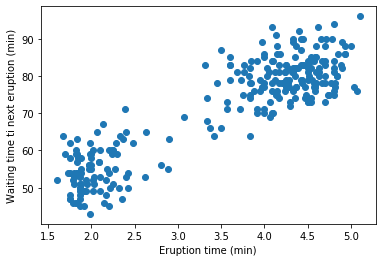

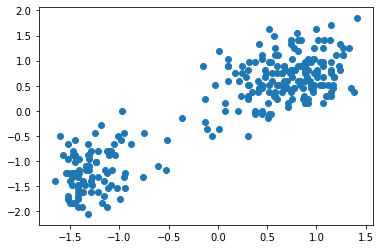

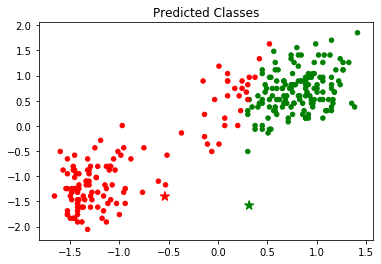

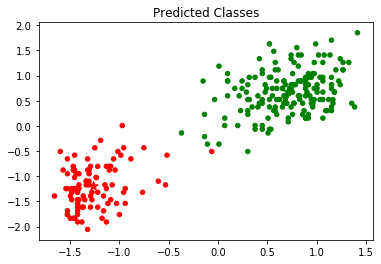

In [78]:
import numpy as np
data = np.genfromtxt('dataset-44970.csv',delimiter=',', skip_header = 1)
import matplotlib.pyplot as plt

plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')
plt.show()

data = (data - data.mean(axis = 0))/data.std(axis = 0)
plt.scatter(*data.T)
plt.show()

centroids = np.random.uniform(-2, 2, 4).reshape((2, 2))

def get_labels(pts, centroids):
    dist = np.hstack([np.linalg.norm(pts - i, axis = 1).reshape(-1,1) for i in centroids])
    return (np.argmin(dist, axis = 1))
    
 
labels = get_labels(data, centroids)

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()

# ОСНОВНАЯ ЧАСТЬ!!!
def norm(labels, obs, centroids):
    n = 0
    for i in range(centroids.shape[0]):
        n += abs(np.linalg.norm(obs[i == labels] - centroids[i], axis = 1).sum())
    return n
    
def k_means(obs, k, iter=20, thresh=1e-05):
    centroids = np.random.random((k, obs.shape[1]))
    labels = get_labels(obs, centroids)
    n = norm(labels, obs, centroids)
    new_centroids = centroids
    for i in range(iter):
        last_n = n;
        centroids = np.array([obs[t == labels].mean(axis = 0) for t in range(k)])
        labels = get_labels(obs, centroids)
        new_n = norm(labels, obs, centroids)
        if (new_n < n):
            new_centroids = centroids
            n = new_n
        if(abs(last_n - new_n) < thresh):
            break
    return new_centroids
   
centroids = k_means(data, 2)
labels = get_labels(data, centroids)

plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()   